# Logistic Regression
This project consist of a CSV file named as "personality_dataset.csv"                    
This dataset is about predicting a person’s personality type (Introvert, Ambivert, or Extrovert) based on different psychological, social, and behavioral traits.

### Import all the required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Let's take a peek at our data         
### We'll use `pandas` to read the CSV file and show the first 5 rows.

In [3]:
df = pd.read_csv("personality_synthetic_dataset.csv")
df

,personality_type,social_energy,alone_time_preference,talkativeness,deep_reflection,group_comfort,party_liking,listening_skill,empathy,creativity,...,spontaneity,adventurousness,reading_habit,sports_interest,online_social_usage,travel_desire,gadget_usage,work_style_collaborative,decision_speed,stress_handling
0,Extrovert,6.794295,3.854670,8.725446,2.515151,7.097368,8.588762,6.774799,6.430132,6.142968,...,4.853313,8.257134,5.270555,10.000000,9.154296,4.816422,9.191711,8.313590,8.032376,7.176905
1,Ambivert,6.378988,5.731157,7.029529,7.274493,4.111199,3.258248,5.550909,3.958179,6.149457,...,6.067201,6.289347,5.753165,5.334303,4.683781,4.725666,5.956141,5.890619,3.158988,3.423577
2,Ambivert,7.459421,6.322263,3.922269,4.622261,5.343276,7.452152,9.483990,6.127654,7.032017,...,5.524244,9.238784,5.250405,3.153540,5.000338,6.139166,6.033048,5.807500,4.571003,5.647480
3,Extrovert,6.159626,3.097837,6.019093,1.965440,7.837140,10.000000,9.436733,8.949684,8.923875,...,4.327018,8.489791,5.312617,8.379936,7.601946,6.370056,5.410145,6.671781,6.600233,5.870088
4,Introvert,5.568462,6.986722,3.913240,9.926161,1.650483,0.362298,7.470387,6.756837,9.507803,...,5.187689,3.167217,7.060235,2.333388,7.771569,5.534336,5.704598,5.832968,5.813099,3.758084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,Ambivert,3.783857,4.345803,8.220063,6.297798,5.162622,5.702266,5.518356,3.420139,5.811565,...,8.521256,4.355973,6.454815,2.557365,6.949292,4.176390,5.649897,5.665498,5.252077,4.297520
19996,Introvert,2.621406,8.152097,2.954341,8.791467,2.670252,2.931244,5.855202,5.044124,6.244061,...,4.818308,2.631298,10.000000,3.697801,3.217559,3.638815,5.177155,5.106628,0.982214,5.873321
19997,Introvert,0.039689,8.277160,5.728101,7.790080,3.427897,0.708457,7.099321,5.784592,5.400400,...,3.318511,4.071008,9.974147,2.954407,5.427296,6.270830,3.793430,5.009167,3.810962,5.678412
19998,Extrovert,7.756725,3.956191,8.906972,3.793775,7.608467,6.292705,6.824980,5.653421,7.347820,...,7.156525,8.148780,3.840900,6.093418,7.814507,8.428745,8.736932,8.060841,8.161087,5.941793


### Sometimes our dataset has empty spots, called missing values. We can use `df.isnull().sum()` to count how many missing values are in each column.


### Let's see all the columns in our dataset and what kind of data each column has (numbers, words, yes/no, etc.). This helps us understand our data better.


In [5]:
df.isnull().sum()

,0
personality_type,0
social_energy,0
alone_time_preference,0
talkativeness,0
deep_reflection,0
group_comfort,0
party_liking,0
listening_skill,0
empathy,0
creativity,0


In [6]:
df.duplicated().sum()


np.int64(0)

In [8]:
df.columns

Index(['personality_type', 'social_energy', 'alone_time_preference',
       'talkativeness', 'deep_reflection', 'group_comfort', 'party_liking',
       'listening_skill', 'empathy', 'creativity', 'organization',
       'leadership', 'risk_taking', 'public_speaking_comfort', 'curiosity',
       'routine_preference', 'excitement_seeking', 'friendliness',
       'emotional_stability', 'planning', 'spontaneity', 'adventurousness',
       'reading_habit', 'sports_interest', 'online_social_usage',
       'travel_desire', 'gadget_usage', 'work_style_collaborative',
       'decision_speed', 'stress_handling'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   personality_type          20000 non-null  object 
 1   social_energy             20000 non-null  float64
 2   alone_time_preference     20000 non-null  float64
 3   talkativeness             20000 non-null  float64
 4   deep_reflection           20000 non-null  float64
 5   group_comfort             20000 non-null  float64
 6   party_liking              20000 non-null  float64
 7   listening_skill           20000 non-null  float64
 8   empathy                   20000 non-null  float64
 9   creativity                20000 non-null  float64
 10  organization              20000 non-null  float64
 11  leadership                20000 non-null  float64
 12  risk_taking               20000 non-null  float64
 13  public_speaking_comfort   20000 non-null  float64
 14  curios

### Let's **count how many people belong to each personality type**.  

<Axes: xlabel='personality_type', ylabel='count'>

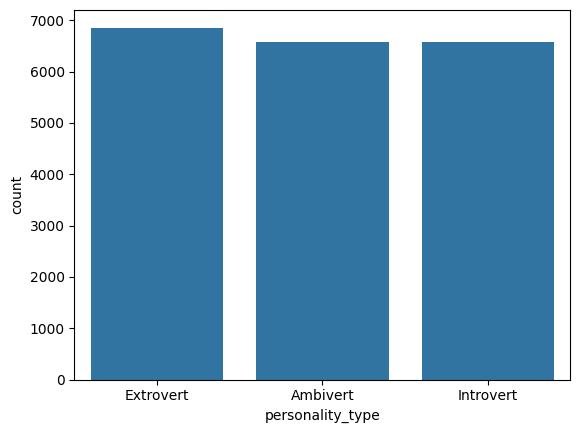

In [11]:
sns.countplot(x = df['personality_type'])

### We want to check **how many people have low, medium, or high social energy**.  
A histogram shows the **count of people** for different ranges of social energy. The line (KDE) shows the smooth trend.

<Axes: xlabel='social_energy', ylabel='Count'>

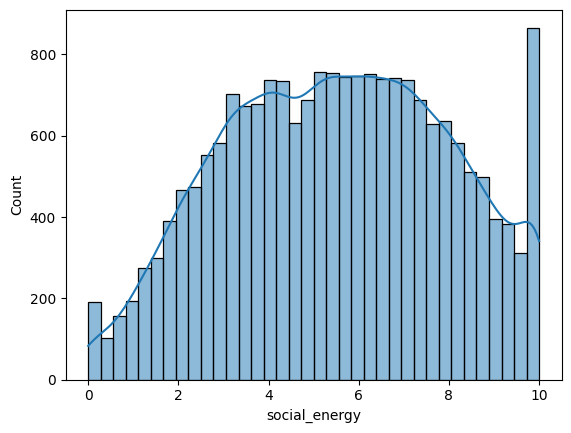

In [12]:
sns.histplot(df['social_energy'],kde = True)

### Let's use a pair plot and see how one column is related to another column                                                              This will help us to know that which columns are more related to each other.

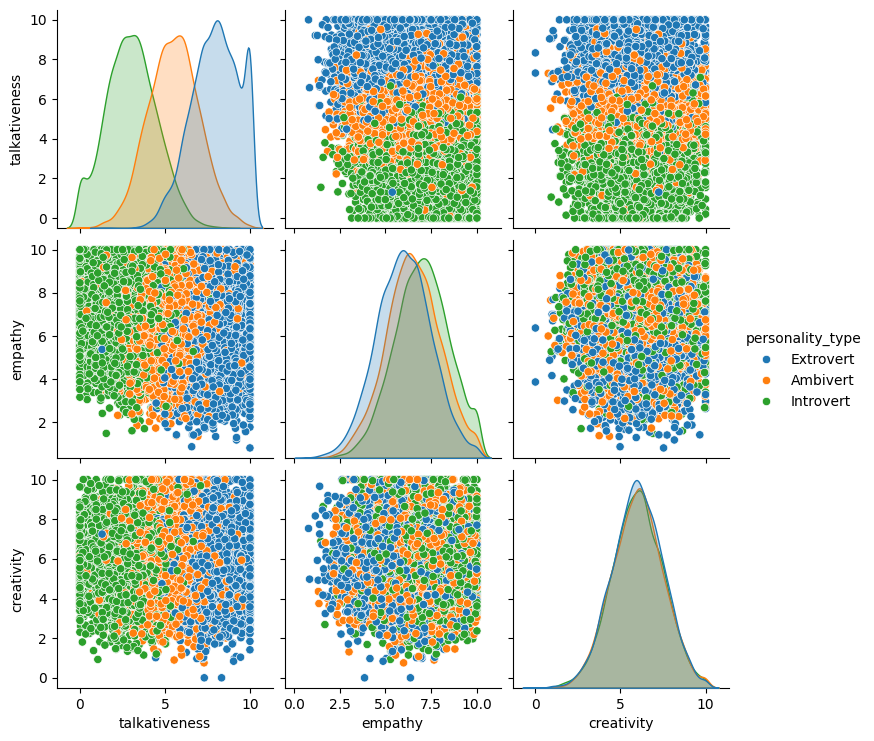

In [13]:
sns.pairplot(df[['talkativeness', 'empathy', 'creativity', 'personality_type']],hue = "personality_type")

In [23]:
from scipy.stats import f_oneway
annova_results = {}
for col in df.columns:
  if col == 'personality_type':
    continue

  groups = [group[col].values for name, group in df.groupby('personality_type')]

  f_stats, p_value = f_oneway(*groups)

  annova_results[col] = {"f_statistics" :f_stats, "p_value" : p_value}

annova_df = pd.DataFrame(annova_results).T

annova_df['significance (p<0.05)'] = annova_df['p_value'] < 0.05

annova_df = annova_df.sort_values(by = "f_statistics",ascending = False)

print(annova_df)



                          f_statistics        p_value  significance (p<0.05)
party_liking              28878.230314   0.000000e+00                   True
alone_time_preference     19614.798420   0.000000e+00                   True
public_speaking_comfort   19578.062000   0.000000e+00                   True
talkativeness             19446.844628   0.000000e+00                   True
excitement_seeking        19160.462944   0.000000e+00                   True
social_energy             18674.734968   0.000000e+00                   True
reading_habit             12422.815562   0.000000e+00                   True
group_comfort             12418.715253   0.000000e+00                   True
leadership                12249.376283   0.000000e+00                   True
adventurousness           11918.450912   0.000000e+00                   True
deep_reflection           11801.516164   0.000000e+00                   True
risk_taking               11664.666534   0.000000e+00                   True

### Machine learning models cannot understand text, so we have to convert `personality_type` to numbers using `LabelEncoder` from sklearn.preprocessing. This lets the model process and learn from it.


In [24]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
le = LabelEncoder()
df['personality_type'] = le.fit_transform(df['personality_type'])

### Split X and y features.

In [44]:
X = df.drop(columns = ['personality_type','emotional_stability','stress_handling','creativity'])
y = df['personality_type']

### Machine learning models work better when all features are on the same scale, so we use `StandardScaler` from `sklearn.preprocessing` to transform the features. This makes each feature have a **mean of 0** and **standard deviation of 1**, helping the model learn efficiently.


In [45]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### To evaluate a machine learning model properly, we split the dataset into training and testing sets using `train_test_split` from `sklearn.model_selection`.
This keeps **80% of the data for training** and **20% for testing**, so the model can learn from one part and be evaluated on unseen data.


In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=42)

### Now we have finally splitted our data as test and train now let's create logistic regression model and we will import it from the

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
model = LogisticRegression()

### Once we have created our model now it's training time

In [49]:
model.fit(X_train,y_train)

LogisticRegression()

### Awesome! The model is trained, and now we can use `.predict(X_test)` to generate predictions on the test set.


In [50]:
y_pred = model.predict(X_test)

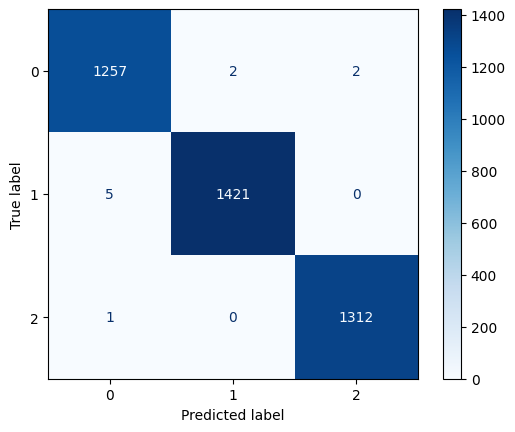

In [51]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(y_test,y_pred)
cm
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap = "Blues")


### Finally, let's evaluate our model’s performance using accuracy. We’ll apply `accuracy_score(y_test, y_pred)` which we will import from `sklearn.metrics`.


In [52]:
from sklearn.metrics import accuracy_score,classification_report
accuracy_score(y_test,y_pred)

0.9975

In [43]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1261
           1       1.00      1.00      1.00      1426
           2       1.00      1.00      1.00      1313

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



In [53]:
import pickle
with open('personality_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [54]:
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)